 Build CNN model using TensorFlow for MNIST problem

In [1]:
# importing the libraries
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

check the version of TensorFlow 

In [2]:
# version of tensorflow
print(tf.__version__)

2.9.1


Load the MNIST dataset using the datasets class of tensorflow.keras

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data(path='mnist.npz')
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

We have loaded the training as well as the test set of the MNIST dataset. Also, we have normalized the pixel values for both training as well as test images. Next, let’s visualize a few images from the dataset

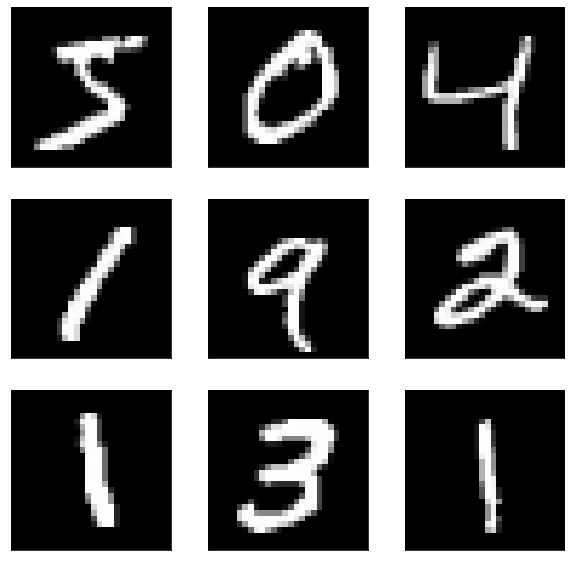

In [4]:
# visualizing a few images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

Subsequently, this is how our dataset looks like. We have images of handwritten digits. Let’s also look at the shapes of the training and test set

In [5]:
# shape of the training and test set
(train_images.shape, train_labels.shape), (test_images.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

We have 60,000 images of shape 28 by 28 in the training set and 10,000 images of the same shape in the test set. Next, we will resize the shape of images and one-hot encode the target variable

In [6]:
# reshaping the images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# one hot encoding the target variable
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Defining Model Architecture

Now, we will define the architecture of our model. So, our model will have 2 convolutional layers, with a combination of max-pooling layers, then we will have a flatten layer and finally a dense layer with 10 neurons since we have 10 classes

In [7]:
# defining the model architecture
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

Quickly look at the summary of the model:

In [8]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

To summarize, we have 2 convolutional layers, 2 max-pooling layers, a flatten layer, and a dense layer. The total number of parameters in the model is 1,198. Now that our model is ready, we will compile it

In [9]:
# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We are using Adam optimizer, and you can change it as well. The loss function is set to be as categorical cross-entropy since we are solving a multi-class classification problem and the metric is accuracy. Now let’s train our model for 10 epochs

In [10]:
# training the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4752 - accuracy: 0.8466 - val_loss: 0.2069 - val_accuracy: 0.9340
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1853 - accuracy: 0.9430 - val_loss: 0.1634 - val_accuracy: 0.9492
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1497 - accuracy: 0.9539 - val_loss: 0.1370 - val_accuracy: 0.9583
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1325 - accuracy: 0.9588 - val_loss: 0.1135 - val_accuracy: 0.9639
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1204 - accuracy: 0.9623 - val_loss: 0.1099 - val_accuracy: 0.9669
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1113 - accuracy: 0.9653 - val_loss: 0.0977 - val_accuracy: 0.9681
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1054 - accuracy: 0.9672 - val_loss: 0.0929 -

To summarize, initially, the training loss was about 0.40 and after 10 epochs, the training loss reduced to 0.09. The training and validation accuracies after 10 epochs are 97.11% and 97.25% respectively.